In [1]:
# This notebook covers EDA (Exploratory Data Analysis) as recommended at site:
# https://www.digitalocean.com/community/tutorials/exploratory-data-analysis-python

# library dependencies

import pandas as pd
import numpy as np
import seaborn as sns

# import matplotlib.pyplot as plt

In [2]:
# Load and view the data

file_path = "Resources/"
# file_name = "adult_c2.data"
file_name = "census_data.csv"
# file_name = "census_data_id2.csv"

input_file = file_path + file_name

# col_names_id = ["p_id", "age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation",
#                 "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country",
#                 "income_grp"]

# col_names = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation",
#              "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country",
#              "income_grp"]

# https://stackoverflow.com/questions/15026698/how-to-make-separator-in-pandas-read-csv-more-flexible-wrt-whitespace-for-irreg
# df_census_income = pd.read_csv(input_file, header=None, names=col_names, memory_map=True, skipinitialspace=True)
df_census_income = pd.read_csv(input_file, memory_map=True)

df_census_income.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#Step 1 - Basic information

# View basic information about the dataset

df_census_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   fnlwgt          32561 non-null  int64 
 4   education       32561 non-null  object
 5   education_num   32561 non-null  int64 
 6   marital_status  32561 non-null  object
 7   occupation      32561 non-null  object
 8   relationship    32561 non-null  object
 9   race            32561 non-null  object
 10  sex             32561 non-null  object
 11  capital_gain    32561 non-null  int64 
 12  capital_loss    32561 non-null  int64 
 13  hours_per_week  32561 non-null  int64 
 14  native_country  32561 non-null  object
 15  income          32561 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [4]:
# df_census_income["education_num"] = pd.to_numeric(df_census_income["education_num"].astype("string"))

In [5]:
# View data descriptive statistics

df_census_income.describe()

,Unnamed: 0,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,16280.000000,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,9399.695394,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,8140.000000,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,16280.000000,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,24420.000000,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,32560.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
#Step 2 - Duplicate values

# Check for any duplicate values

df_census_income.duplicated().sum()

0

In [7]:
# Note: athough there are 24 duplicates, considering dataset this can be expected
# as income_grp column is already binned.

In [8]:
#Step 3 - Unique values in the data

# Find the unique data values of each column

df_census_income["age"].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [9]:
df_census_income["education"].sort_values().unique()

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object)

In [10]:
for col in df_census_income.columns:
    print(f"Unique value(s) in column \'{col}\', dtype={df_census_income[col].dtype}:")
    print(f"{df_census_income[col].sort_values().unique()}\n")

Unique value(s) in column 'Unnamed: 0', dtype=int64:
[    0     1     2 ... 32558 32559 32560]

Unique value(s) in column 'age', dtype=int64:
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 90]

Unique value(s) in column 'workclass', dtype=object:
[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']

Unique value(s) in column 'fnlwgt', dtype=int64:
[  12285   13769   14878 ... 1366120 1455435 1484705]

Unique value(s) in column 'education', dtype=object:
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']

Unique value(s) in column 'education_num', dtype=int64:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]



<AxesSubplot:xlabel='count', ylabel='age'>

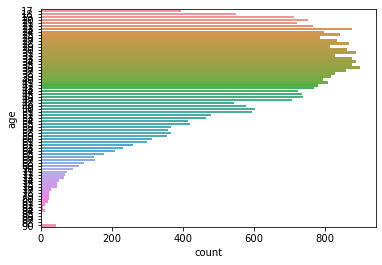

In [11]:
#Step 4 - Visualize the Unique counts

# Plot the unique values

sns.countplot(y=df_census_income["age"])

<AxesSubplot:xlabel='count', ylabel='workclass'>

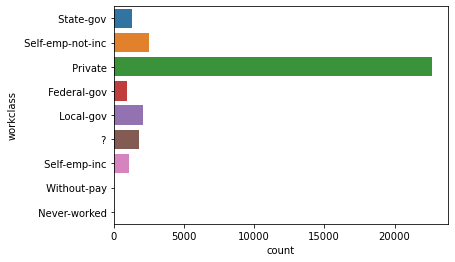

In [12]:
sns.countplot(y=df_census_income["workclass"])

<AxesSubplot:xlabel='count', ylabel='workclass'>

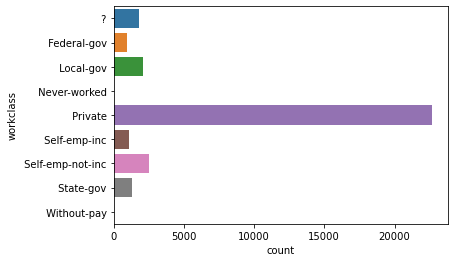

In [13]:
sns.countplot(y=df_census_income["workclass"].sort_values())

<AxesSubplot:xlabel='count', ylabel='education'>

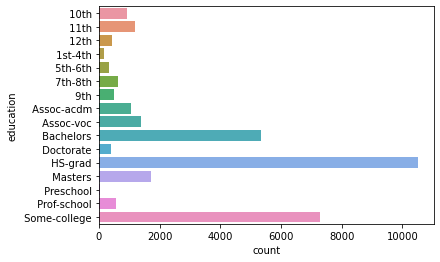

In [14]:
sns.countplot(y=df_census_income["education"].sort_values())

<AxesSubplot:xlabel='count', ylabel='education_num'>

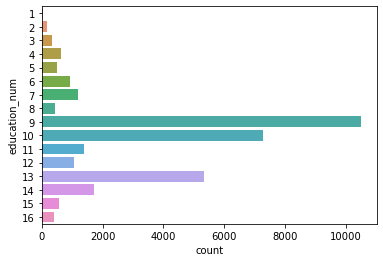

In [15]:
sns.countplot(y=df_census_income["education_num"])

<AxesSubplot:xlabel='count', ylabel='marital_status'>

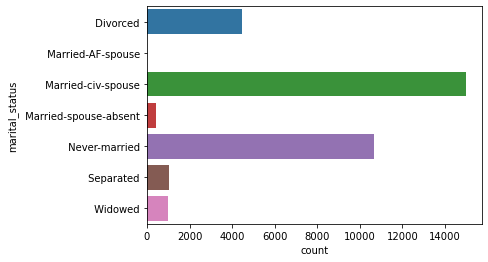

In [16]:
sns.countplot(y=df_census_income["marital_status"].sort_values())

<AxesSubplot:xlabel='count', ylabel='occupation'>

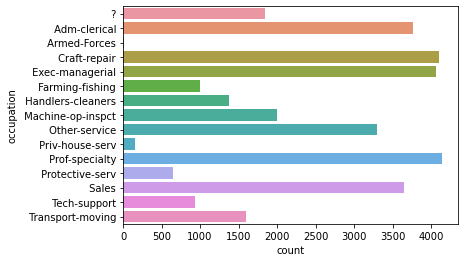

In [17]:
sns.countplot(y=df_census_income["occupation"].sort_values())

<AxesSubplot:xlabel='count', ylabel='relationship'>

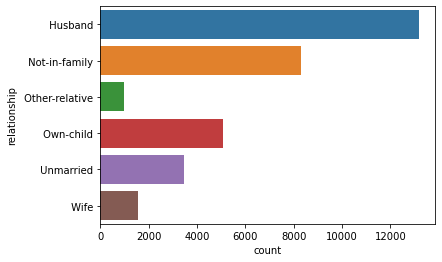

In [18]:
sns.countplot(y=df_census_income["relationship"].sort_values())

<AxesSubplot:xlabel='count', ylabel='race'>

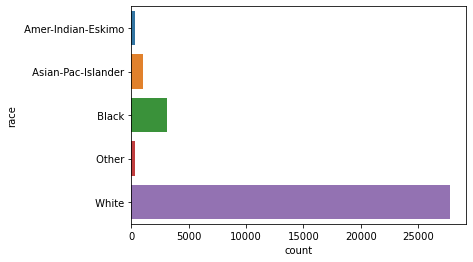

In [19]:
sns.countplot(y=df_census_income["race"].sort_values())

<AxesSubplot:xlabel='count', ylabel='sex'>

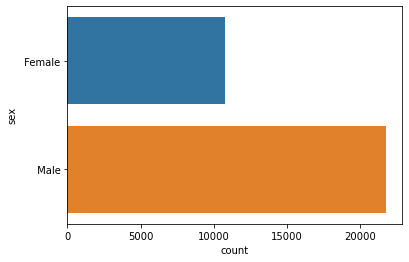

In [20]:
sns.countplot(y=df_census_income["sex"].sort_values())

<AxesSubplot:xlabel='capital_gain', ylabel='count'>

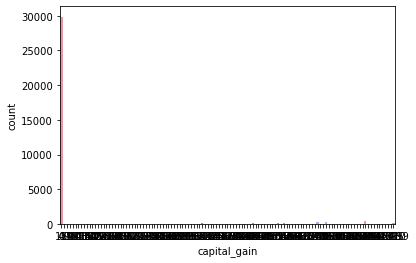

In [21]:
sns.countplot(x=df_census_income["capital_gain"].sort_values())

In [22]:
df_census_income["capital_gain"].value_counts().sort_index()

0        29849
114          6
401          2
594         34
914          8
         ...  
25236       11
27828       34
34095        5
41310        2
99999      159
Name: capital_gain, Length: 119, dtype: int64

<AxesSubplot:xlabel='capital_loss', ylabel='count'>

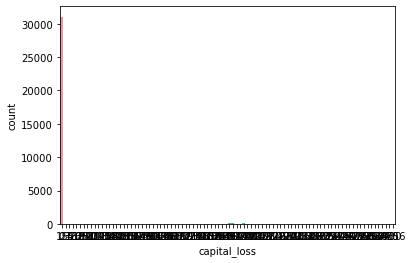

In [23]:
sns.countplot(x=df_census_income["capital_loss"].sort_values())

In [24]:
df_census_income["capital_loss"].value_counts().sort_index()

0       31042
155         1
213         4
323         3
419         3
        ...  
3004        2
3683        2
3770        2
3900        2
4356        3
Name: capital_loss, Length: 92, dtype: int64

<AxesSubplot:xlabel='count', ylabel='hours_per_week'>

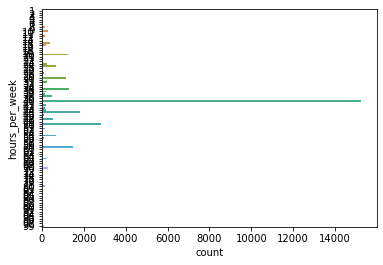

In [25]:
sns.countplot(y=df_census_income["hours_per_week"].sort_values())

In [26]:
df_census_income["hours_per_week"].value_counts().sort_index()

1     20
2     32
3     39
4     54
5     60
      ..
95     2
96     5
97     2
98    11
99    85
Name: hours_per_week, Length: 94, dtype: int64

<AxesSubplot:xlabel='count', ylabel='native_country'>

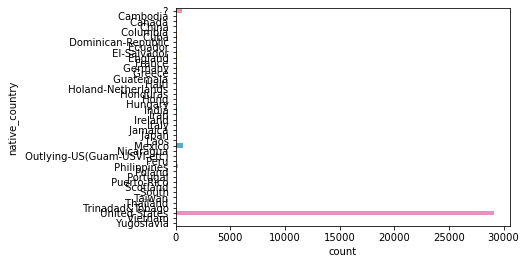

In [27]:
sns.countplot(y=df_census_income["native_country"].sort_values())

In [28]:
df_census_income["native_country"].value_counts().sort_index()

 ?                               583
 Cambodia                         19
 Canada                          121
 China                            75
 Columbia                         59
 Cuba                             95
 Dominican-Republic               70
 Ecuador                          28
 El-Salvador                     106
 England                          90
 France                           29
 Germany                         137
 Greece                           29
 Guatemala                        64
 Haiti                            44
 Holand-Netherlands                1
 Honduras                         13
 Hong                             20
 Hungary                          13
 India                           100
 Iran                             43
 Ireland                          24
 Italy                            73
 Jamaica                          81
 Japan                            62
 Laos                             18
 Mexico                          643
 

In [29]:
df_census_income["native_country"].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

<AxesSubplot:xlabel='count', ylabel='income'>

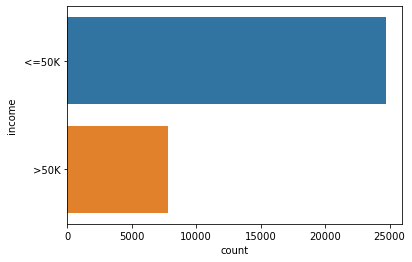

In [30]:
# sns.countplot(y=df_census_income["income_grp"].sort_values())
sns.countplot(y=df_census_income["income"].sort_values())

In [31]:
#Step 5 - Find the Null values
#"Finding the null values is the *most important* step in the EDA."

# Find null values

df_census_income.isnull().sum()

Unnamed: 0        0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [32]:
# No nulls to be expected since data was pre-cleaned, with
# 'native_country' unknowns already changed to '?' values.

In [33]:
#Step 6 - Replace the Null values

# Choose a replacement value appropriate for dtype to be replaced.
# Maybe change np.nan for 'int64' dtype to zero.
# For example, the following *would be* run to accomplish this ...
##df.replace(np.nan,'0',inplace=True)
#
# ... and then the changes rechecked ...
##df.isnull().sum()
#
# ... to see that all sums were zero (0).

# Quote from author of article- Prajwal CN- Developer and author
# at DigitalOcean: "I have used 0 to replace null values. You can
# opt for more meaningful methods such as mean or median."

In [34]:
#Step 7 - Know the datatypes

# Check datatypes

df_census_income.dtypes

Unnamed: 0         int64
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [35]:
#Step 8 - Filter the Data

# Filter the data based on some logic ...

In [36]:
# search_text = b"b' United-States'"
search_text = "United-States"

df_census_income[df_census_income["native_country"] == search_text].head(10)

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income


In [37]:
# ## Commenting-out this code block- was for selecting column after discovered there
# ## was a space before the string values; before looking up 'skipinitialspace=True'
# ## option when loading (and viewing) the data file.

# # mask_country = df_census_income.loc[:, "native_country"]
# # mask_country = df_census_income["native_country"].astype(str) == b"b' United-States'"
# # mask_country = df_census_income["native_country"].astype(str) == " United-States"
# mask_country = df_census_income["native_country"].astype(str) == "United-States"

# df_census_income_masked = df_census_income[mask_country].copy()

# df_census_income_masked.head()

# print(df_census_income["native_country"].value_counts())

# print(type(mask_country))

# mask_country.value_counts()

In [38]:
df_census_income.columns.to_list()

['Unnamed: 0',
 'age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

In [39]:
df_census_income.dtypes

Unnamed: 0         int64
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [40]:
# ## Commenting-out this code block also- like one above, was (an attempt here) to
# ## select column before looked up 'skipinitialspace=True' option to load/view file.

# # df_census_income["native_country"] = df_census_income["native_country"].astype('|S')
# df_census_income["native_country"] = df_census_income["native_country"].astype(str)

# df_census_income.dtypes

In [41]:
# ## Same comment as for code cell block above.

# df_census_income[df_census_income["native_country"] == " United-States"]

In [42]:
df_census_income["age"].value_counts().sort_index()

17    395
18    550
19    712
20    753
21    720
     ... 
85      3
86      1
87      1
88      3
90     43
Name: age, Length: 73, dtype: int64

In [43]:
df_census_income[df_census_income["education_num"] == 1]["native_country"].value_counts()

 United-States         17
 Mexico                17
 El-Salvador            4
 Dominican-Republic     2
 China                  2
 Cambodia               1
 Philippines            1
 ?                      1
 India                  1
 Nicaragua              1
 Laos                   1
 Hong                   1
 Guatemala              1
 Puerto-Rico            1
Name: native_country, dtype: int64

In [44]:
df_census_income[["education", "education_num"]].value_counts()

education      education_num
 HS-grad       9                10501
 Some-college  10                7291
 Bachelors     13                5355
 Masters       14                1723
 Assoc-voc     11                1382
 11th          7                 1175
 Assoc-acdm    12                1067
 10th          6                  933
 7th-8th       4                  646
 Prof-school   15                 576
 9th           5                  514
 12th          8                  433
 Doctorate     16                 413
 5th-6th       3                  333
 1st-4th       2                  168
 Preschool     1                   51
dtype: int64

In [45]:
df_census_income[["education_num", "education"]].value_counts().sort_index()

education_num  education    
1               Preschool          51
2               1st-4th           168
3               5th-6th           333
4               7th-8th           646
5               9th               514
6               10th              933
7               11th             1175
8               12th              433
9               HS-grad         10501
10              Some-college     7291
11              Assoc-voc        1382
12              Assoc-acdm       1067
13              Bachelors        5355
14              Masters          1723
15              Prof-school       576
16              Doctorate         413
dtype: int64

In [46]:
# for lev in df_census_income["education"].columns():
#     print(f"{df_census_income[lev]} has {df_census_income[lev].value_counts()} records.")

# df_census_income["education_num"].value_counts().sort_index()

# df_census_income["education_num"].unique()
df_census_income[df_census_income["education_num"] > 8]

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [47]:
# df_census_income["capital_gain"].value_counts().sort_index()

In [48]:
# dfci =  df_census_income.copy()

In [49]:
# dfci[]

<AxesSubplot:>

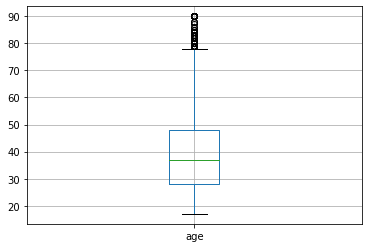

In [50]:
#Step 9 - A quick box plot
#"You can create a box plot for any numerical column using a single line of code."

# Boxplot

df_census_income[["age"]].boxplot()

<AxesSubplot:>

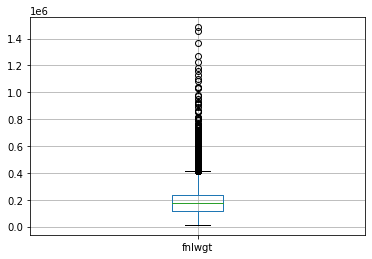

In [51]:
df_census_income[["fnlwgt"]].boxplot()

<AxesSubplot:>

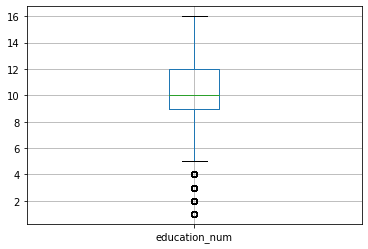

In [52]:
df_census_income[["education_num"]].boxplot()

<AxesSubplot:>

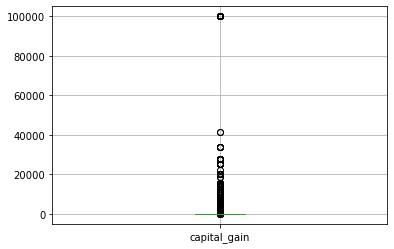

In [53]:
df_census_income[["capital_gain"]].boxplot()

<AxesSubplot:>

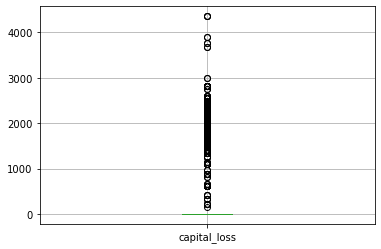

In [54]:
df_census_income[["capital_loss"]].boxplot()

<AxesSubplot:>

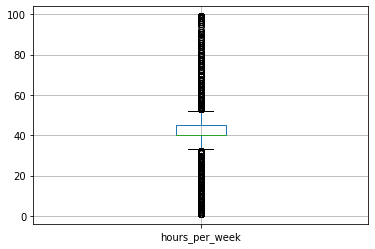

In [55]:
df_census_income[["hours_per_week"]].boxplot()

In [56]:
#Step 10 - Correlation Plot - EDA
#Can find "fair idea of the correlation strength between different variables."

# Correlation

df_census_income.corr()

,Unnamed: 0,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
Unnamed: 0,1.000000,0.001286,-0.003153,-0.001079,0.001672,-0.001188,0.000607
age,0.001286,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.003153,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,-0.001079,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.001672,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,-0.001188,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.000607,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [57]:
# if df_census_income["income_grp"] == ">50K":
#     df_census_income["income_lev"] = 1
# else:
#     df_census_income["income_lev"] = 0

# see code block below for using a lambda function instead ...

In [58]:
# Use lambda function to create new numerical column for a correlation

# https://www.geeksforgeeks.org/using-apply-in-pandas-lambda-functions-with-multiple-if-statements/
# Adding the "income_lev" column
# df_census_income["income_lev"] = df_census_income["income_grp"].apply(lambda x: 1 if x==">50K" else 0)

df_census_income["income_lev"] = df_census_income["income"].apply(lambda x: 1 if x==">50K" else 0)

In [59]:
# Rerun a correlation with new numerical column
df_census_income.corr()

# The correlation matrix ranges from +1 to -1; where +1 represents highly and
# positively correlated and -1 will be highly negatively correlated.

,Unnamed: 0,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_lev
Unnamed: 0,1.000000,0.001286,-0.003153,-0.001079,0.001672,-0.001188,0.000607,NaN
age,0.001286,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,NaN
fnlwgt,-0.003153,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,NaN
education_num,-0.001079,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,NaN
capital_gain,0.001672,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,NaN
capital_loss,-0.001188,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,NaN
hours_per_week,0.000607,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,NaN
income_lev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

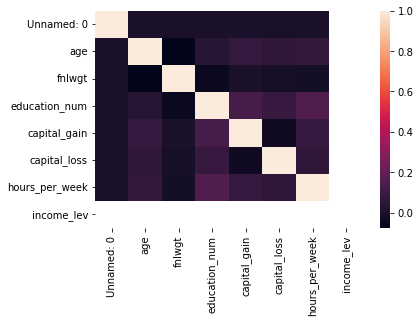

In [60]:
#"Visualize the correlation matrix usng *seaborn library* ...

# Correlation plot

sns.heatmap(df_census_income.corr())

In [61]:
df_census_income.head(50)

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income_lev
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
5,5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
6,6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
7,7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,0
8,8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,0
9,9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,0


In [62]:
# TO DO: Create function to bin 'education'/'education_num' into 'education_cat' column.

# df_census_income["education_cat"].apply(get_)